### Neural Network

In [1]:
# import dependencies
import matplotlib.pyplot as plt
import mlrose_hiive
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.metrics import accuracy_score
from sklearn.model_selection import (GridSearchCV, train_test_split, validation_curve)   
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

np.random.seed(10)

In [2]:
def load_data(dataset):
    # df = pd.read_csv("data/" + dataset, header=None)
    df = pd.read_csv("data/" + dataset)
    X, y = df.iloc[:, :-1], df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    print("Dataset Filename: {}".format(dataset))
    print()

    print("Number of features: {}".format(len(df.columns) - 1))
    print()

    print("Total Samples: {}".format(len(df)))
    print()
    
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)

    return X_train, X_test, y_train, y_test

In [3]:
# Load Data
smoke_df = pd.read_csv("../supervised_learning_assignment/datasets/smoke_detection_iot.csv")

X_train, X_test, y_train, y_test = train_test_split(
    smoke_df.drop(['Fire Alarm'], axis=1), # predictive variables
    smoke_df['Fire Alarm'], # target
    test_size=0.30, # portion of dataset to allocate to test set
    random_state=10, # we are setting the seed here
)

X_train.shape, X_test.shape

# Best hyper parameters
learning_rate_init = 0.01

### Back Prop

In [5]:
clf = mlrose_hiive.NeuralNetwork(hidden_nodes=[5,9], activation="tanh",
                           algorithm = 'gradient_descent',early_stopping = True,
                           max_attempts = 100, max_iters = 5000,
                           bias = True, learning_rate = .01,
                           restarts=0, curve = True, random_state=42)


start_time = time.time()

clf.fit(X_train, y_train)

end_time = time.time()

base_time = end_time-start_time

y_pred = clf.predict(X_test)

base_final_score = accuracy_score(y_test, y_pred)

gd_fitness_curve = clf.fitness_curve

### Random Hill Climb

In [6]:
clf = mlrose_hiive.NeuralNetwork(hidden_nodes=[5,9], activation='tanh',
                           algorithm = 'random_hill_climb', early_stopping = True,
                           max_attempts = 100, max_iters = 5000,
                           bias = True, learning_rate = .01,
                           restarts=0, curve = True, random_state=42)

start_time = time.time()

clf.fit(X_train, y_train)

end_time = time.time()

rhc_time = end_time-start_time

y_pred = clf.predict(X_test)

rhc_final_score = accuracy_score(y_test, y_pred)

rhc_fitness_curve = clf.fitness_curve

### Simulated Annealing

In [7]:
clf = mlrose_hiive.NeuralNetwork(hidden_nodes=[5,9], activation='tanh',
                           algorithm = 'simulated_annealing', early_stopping = True,
                           max_attempts = 100, max_iters = 5000,
                           bias = True, learning_rate = .01,
                           restarts=0, curve = True, random_state=42)
start_time = time.time()

clf.fit(X_train, y_train)

end_time = time.time()

sa_time = end_time-start_time

y_pred = clf.predict(X_test)

sa_final_score = accuracy_score(y_test, y_pred)

sa_fitness_curve = clf.fitness_curve

### Genetic Algorithms

In [8]:
clf = mlrose_hiive.NeuralNetwork(hidden_nodes=[5,9], activation='tanh',
                           algorithm = 'genetic_alg', early_stopping = True,
                           max_attempts = 100, max_iters = 5000,
                           bias = True, learning_rate = .0001,
                           restarts=0, curve = True, random_state=42)

clf.fit(X_train, y_train)

start_time = time.time()

clf.fit(X_train, y_train)

end_time = time.time()

ga_time = end_time-start_time

y_pred = clf.predict(X_test)

ga_final_score = accuracy_score(y_test, y_pred)

ga_fitness_curve = clf.fitness_curve

Text(0, 0.5, 'Loss')

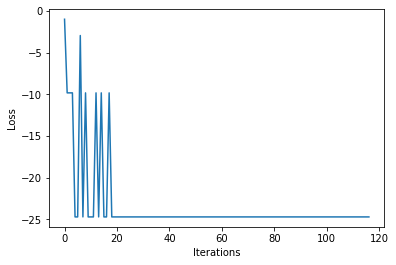

In [9]:
plt.plot(gd_fitness_curve)
plt.xlabel("Iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

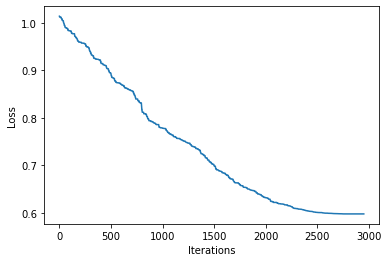

In [10]:
plt.plot(rhc_fitness_curve[:, 0])
plt.xlabel("Iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

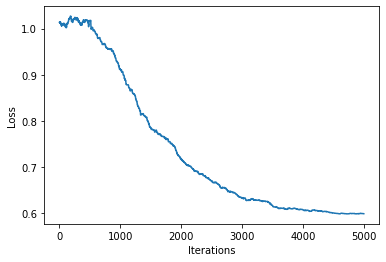

In [11]:
plt.plot(sa_fitness_curve[:, 0])
plt.xlabel("Iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

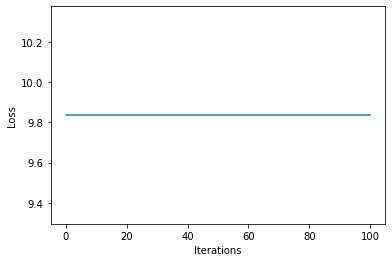

In [12]:
plt.plot(ga_fitness_curve[:, 0])
plt.xlabel("Iterations")
plt.ylabel("Loss")

In [13]:
base_time

4.069315195083618

In [14]:
sa_time

121.30617594718933

In [15]:
rhc_time

48.194047927856445

In [16]:
ga_time

242.72805094718933